# Phase 3 Code Challenge Review

Made using resources from the Seattle team - thanks y'all.

## Overview

* Gradient Descent
* Logistic Regression
* Classification Metrics
* Decision Trees

In [1]:
# Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.tree import export_graphviz

In [2]:
# from src.call import call_on_students

## Part 1: Gradient Descent

### Set Up

In [3]:
# Grab the data from 'auto-mpg.csv'
mpg_df = pd.read_csv("data/auto-mpg.csv")

In [4]:
# Explore the data
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


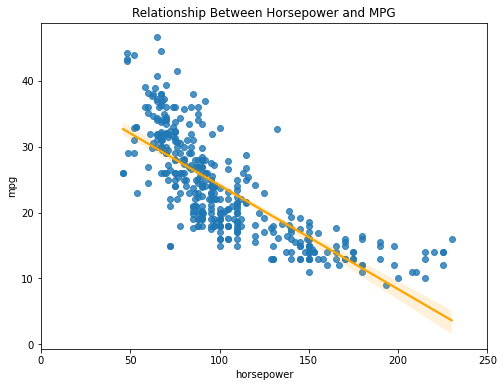

In [5]:
# Let's plot a simple linear regression line using just the horsepower column
plt.figure(figsize=(8, 6))
sns.regplot(x='horsepower', y='mpg', data=mpg_df, line_kws={"color":"orange"})
plt.title('Relationship Between Horsepower and MPG')
plt.xlim(0, 250)
plt.show()

The above graph shows an approximate best fit line for the relationship between `horsepower` and `mpg` in our data.


### 1) Describe the below chart: What is it showing? What does it tell us?

![Slope-RSS relationship image](images/slope-rss-relationship.png)

In [ ]:
# call_on_students(1)

#### Answer: 

- Cost/Loss function (residual sum of squares (RSS))
- minimum of the cost function (smallest error) will be the slope/coefficient of the line of best fit.


### 2) Imagine that you're starting at a slope towards the top upper left corner. Describe how gradient descent would work.

In [ ]:
# call_on_students(1)

#### Answer: 

- Finding the partial derivative (gradient) of the function at the upper left corner (at that particular point) to point us in which direction to go toward the minimum. 
- We then take a step down in the direction toward our minimum. We repeat this proess until we have reached our minimum. Gradient determines step size with a BIG ASTERISK HEH.


### 3) What is a step size when talking about gradient descent? How does learning rate regulate step size?

In [ ]:
# call_on_students(1)

#### Answer: 

- Step size should sort of be a reflection of how far away you are from the minimum. Further away = larger steps, as we get closer, we take smaller steps.

- Learning Rate is the proportion of the partial derivative that you want to take. 


## Part 2: Logistic Regression

### 4) Describe a logistic regression model:

- What kind of target is a logistic regression model used for?
- What are the predictions that a logistic regression model outputs?
- How is it different from linear regression?
- Is it a parametric or non-parametric model?

In [ ]:
# call_on_students(1)

#### Answer: 

- Target: Classification (binary or multiclass). Categorical target data.
- Prediction outputs are log odds translated into probabilities, using logit function.
- Logistic doesn't predict a continuous value, rather the probability that the target falls into one class or the other (bound by 0 and 1 on either end).
- Logistic is a parametric model because it gives coefficient
- Both linear and logistic regression have loss that we are trying to identify--the model is trying to identify parameters/coefficients for you.
    - a NON parametric model (like a decision tree) doesn't optimize parameters. it just classifies based on the parameters you give.


### 5) Compare a logistic regression model to any of the other model types we've learned:

- List one benefit of logistic regression when compared to the other model type
- List one reason the other model type might be more useful

In [ ]:
# call_on_students(1)

#### Answer: 

- Benefit - simple to interpret (has coefs that can be spoken in manner of y (target)), small fitting times, not super prone to overfitting compared to (for example) a decision tree. can give us probabilities for classes(more fine-tuned confidence)

- Still a linear model at the end of the day, doesn't handle multiclass as well as other algorithms. Doesn't handle class imbalance very well by default. Think about threshold being 0.5.


## Part 3: Logistic Regression and Classification Metrics with Code

### Set Up

In [7]:
# Let's use the same data, but now with a classification target
mpg_class = pd.read_csv('data/auto-mpg-classification.csv')

In [8]:
# Check this new dataframe out
mpg_class.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,target
0,8,307.0,130,3504,12.0,70,1,0
1,8,350.0,165,3693,11.5,70,1,1
2,8,318.0,150,3436,11.0,70,1,0
3,8,304.0,150,3433,12.0,70,1,1
4,8,302.0,140,3449,10.5,70,1,1


### 6) Prepare our data for modeling:

1. Perform a train/test split
2. Scale the inputs


In [ ]:
# call_on_students(1)

In [9]:
# Train-test split
# Set test_size=0.33 and random_state=42
X = mpg_class.drop(columns=['target'])
y = mpg_class['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [15]:
# Scale the data
ss = StandardScaler()
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)


### 7) Explore the `target` column and our model-less baseline

1. What is the breakdown of the `target` column in our training data?
2. What would a model-less baseline look like in this context?
3. How accurate would that model-less understanding be on our test data?

In [ ]:
# call_on_students(1)

#### Part 1: explore the target column breakdown in train data

In [13]:
# Code to explore
y_train.value_counts(normalize=True)

0    0.744275
1    0.255725
Name: target, dtype: float64

#### Answer:

- 195 non-american and 67 american cars within the dataset. Imbalanced dataset (74% of data in once class).


#### Part 2: What would a model-less baseline look like in this context?

#### Answer:

- Always return the most common class in this case 0. 


#### Part 3: How accurate would that baseline be on test data?


In [ ]:
# Code to find the answer
Basically this would be the 74% code-finding above with normalize.

#### Answer:

- 


### 8) What is one problem you could foresee based on this breakdown, and what is one strategy you could employ to address that problem?

In [ ]:
# call_on_students(1)

In [16]:
len(X_train_scaled)

262

#### Answer:

- Our target is imbalanced, baseline accuracy might be high. Either recall or preceision will be high but the other really low, which can be misleading.

- SMOTE - oversampling minority or undersample majority. Based on our small sample size, we want to avoid undersampling, so we could over-sample our miroity class (1). There is no cutoff sample for what is large/small. If you have 1MM data points you are probably OK to call it large. 200 is definitely small.
- adjust class_weights


### 9) Fit a logistic regression model, and plot a confusion matrix of the results on our test set

In [ ]:
# call_on_students(1)

In [17]:
# Fit a logistic regression model
# Name the model `logreg` and set random_state = 42
logreg = LogisticRegression(random_state=42)

logreg.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

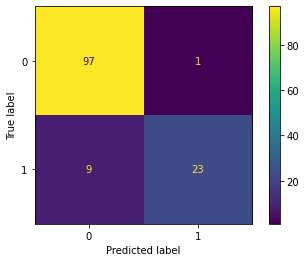

In [21]:
# Plot a confusion matrix on the test data
plot_confusion_matrix(estimator=logreg, X=X_test_scaled, y_true=y_test);

### 10) Calculate the accuracy, precision, recall and f1-score for the test set

You can use the confusion matrix above, or sklearn functions

In [ ]:
# call_on_students(1)

In [23]:
# Accuracy
accuracy = (23 + 97) / (23 + 97 + 9 + 1)
print(accuracy)


y_pred = logreg.predict(X_test_scaled)

accuracy2 = accuracy_score(y_test, y_pred)
print(accuracy2)

0.9230769230769231
0.9230769230769231


In [26]:
# Precision
prec_hard = 23/ (23 + 1)
print(prec_hard)

precision = precision_score(y_test, y_pred)
print(precision)

0.9583333333333334
0.9583333333333334


In [30]:
# Recall
rec_hard = 23 /(23+ 9)
recall = recall_score(y_test, y_pred)
print(rec_hard)
print(recall)

0.71875
0.71875


In [32]:
# F1-Score
f1hard = 2 * (precision * recall) / (precision + recall)
print(f1hard)
f1 = f1_score(y_test, y_pred)
print(f1)

0.8214285714285714
0.8214285714285714


### 11) Calculate the ROC-AUC on the test set, and plot the ROC curve

For this you'll definitely want to use the sklearn functions!

In [ ]:
# call_on_students(1)

In [35]:
probs = logreg.predict_proba(X_test_scaled)
probs

array([[9.97117884e-01, 2.88211554e-03],
       [9.95334221e-01, 4.66577929e-03],
       [9.99860889e-01, 1.39110635e-04],
       [9.97699595e-01, 2.30040460e-03],
       [9.99634518e-01, 3.65481656e-04],
       [9.99043618e-01, 9.56382448e-04],
       [2.79904115e-03, 9.97200959e-01],
       [9.99026897e-01, 9.73103080e-04],
       [9.33336333e-01, 6.66636668e-02],
       [9.99464221e-01, 5.35778541e-04],
       [8.93497133e-03, 9.91065029e-01],
       [9.57162834e-01, 4.28371664e-02],
       [1.54609949e-01, 8.45390051e-01],
       [9.98638756e-01, 1.36124411e-03],
       [9.11830111e-01, 8.81698888e-02],
       [9.99686066e-01, 3.13933548e-04],
       [9.39695786e-01, 6.03042137e-02],
       [9.99734687e-01, 2.65313401e-04],
       [9.99421021e-01, 5.78978925e-04],
       [9.99475392e-01, 5.24607746e-04],
       [8.74667951e-01, 1.25332049e-01],
       [9.99923819e-01, 7.61806157e-05],
       [9.99914240e-01, 8.57600530e-05],
       [1.32938166e-01, 8.67061834e-01],
       [9.993896

In [40]:
# WE NEED TO INDEX IN AND GRAB ONLY THE APPROPRIAT VALUES, basically the 2nd column of probs.
probs1 = probs[:,1]
print(probs1)

[2.88211554e-03 4.66577929e-03 1.39110635e-04 2.30040460e-03
 3.65481656e-04 9.56382448e-04 9.97200959e-01 9.73103080e-04
 6.66636668e-02 5.35778541e-04 9.91065029e-01 4.28371664e-02
 8.45390051e-01 1.36124411e-03 8.81698888e-02 3.13933548e-04
 6.03042137e-02 2.65313401e-04 5.78978925e-04 5.24607746e-04
 1.25332049e-01 7.61806157e-05 8.57600530e-05 8.67061834e-01
 6.10344912e-04 3.70596692e-03 3.16963718e-02 3.55067473e-01
 7.97034531e-04 8.03000867e-03 9.47397282e-01 2.14512246e-02
 2.14283145e-01 5.59151712e-04 9.81588597e-01 6.04199292e-05
 9.65393863e-01 2.39633260e-03 9.66323397e-01 9.99312202e-01
 9.25243170e-01 1.12718485e-03 5.35187366e-05 1.74465054e-03
 9.67079081e-01 9.98817896e-01 2.81251779e-01 1.54823217e-04
 3.73172409e-03 3.01269772e-04 9.81312227e-01 9.71495990e-03
 7.19653335e-03 1.70555661e-04 4.01109500e-03 3.35217499e-01
 2.18932667e-01 4.18732229e-02 1.91139961e-02 1.10235630e-02
 9.99491903e-01 3.48097227e-02 5.60898326e-03 8.88496513e-03
 2.01295433e-03 1.122974

In [39]:
# Calculate roc-auc
roc_auc_score(y_test, probs1)

0.9811862244897959

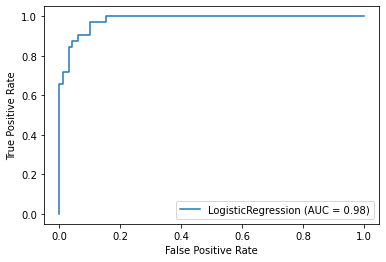

In [41]:
# Plot the ROC curve
plot_roc_curve(logreg, X_test_scaled, y_test);

### 12) Evaluate! Based on the metrics of our test data, how is our model doing?

In [ ]:
# call_on_students(1)

#### Answer:

- Accuracy is 92%, much improved over the baseline. precision is high as well, (avoiding false positives). More False negatives than False Positives.

- Our model is predicting the correct class in 92% of cases.


## Part 4: Decision Trees

### Set Up


| Version 1: Weight | Version 2: Origin |
| ----------------- | ----------------- |  
| ![max depth 1 - version 1](images/dt-maxdepth1-v1.png) | ![max depth 1 - version 2](images/dt-maxdepth1-v2.png) |

### 13) Which of these trees does a better job splitting the data? How can you tell?

In [ ]:
# call_on_students(1)

#### Answer:

- Better split = more pure split
- Version 1 is better because value breakdowns look better. gini impurity looks better also (add impurities together, whichever sum is less is the better split)


### 14) Fit a decision tree model, and plot a confusion matrix of the results on our test set

In [ ]:
# call_on_students(1)

In [43]:
# Fit a decision tree model
# Name the model `dt` and set random_state = 42
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

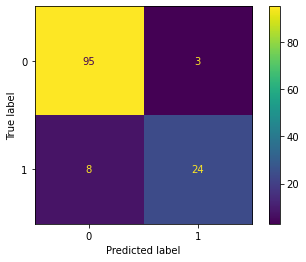

In [46]:
# Plot a confusion matrix on the test data
plot_confusion_matrix(dt, X_test_scaled, y_test);

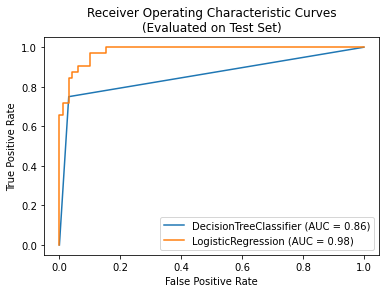

In [45]:
# Code to visualize the ROC curves for the models we've done
fig, ax = plt.subplots()
plot_roc_curve(dt, X_test_scaled, y_test, ax=ax)
plot_roc_curve(logreg, X_test_scaled, y_test, ax=ax)

plt.title("Receiver Operating Characteristic Curves\n(Evaluated on Test Set)")
plt.show()

### 15) Which is the better model according to ROC-AUC score? How can you tell?

In [ ]:
# call_on_students(1)

#### Answer:

- Log Reg looks to be better because of the shape. Larger area under the curve, values accelerate to 1 much faster.
